In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [19]:
annthyroid = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\annthyroid-unsupervised-ad.csv", header = None)

In [20]:
annthyroid

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.06100,0.0060,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02900,0.0150,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.02900,0.0190,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.11400,0.0030,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.04900,0.0030,0.005,0.116,0.004,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00047,0.0080,0.154,0.075,0.204,n
6912,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,0.125,0.107,0.117,n
6913,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0250,0.125,0.114,0.109,n
6914,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,0.106,0.088,0.121,n


In [21]:
shuffled_df = annthyroid.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.03900,0.0070,0.099,0.089,0.111,o
1,0.72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00080,0.0180,0.093,0.079,0.117,n
2,0.39,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00150,0.0280,0.131,0.126,0.104,n
3,0.32,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00096,0.0206,0.122,0.107,0.114,n
4,0.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00062,0.0230,0.102,0.103,0.099,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00015,0.0220,0.151,0.091,0.166,n
6912,0.34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00001,0.0400,0.239,0.090,0.266,n
6913,0.19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00208,0.0290,0.135,0.081,0.167,n
6914,0.42,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00012,0.0206,0.149,0.104,0.143,n


In [22]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.529431,-0.666440,-0.394405,-0.125951,-0.115470,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,2.181882,-1.762158,-0.339164,-0.454868,-0.110044
1,1.053620,1.500509,-0.394405,-0.125951,-0.115470,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.160641,-0.292018,-0.509597,-0.977724,0.060335
2,-0.691022,-0.666440,2.535463,-0.125951,8.660254,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.117715,1.044472,0.569813,1.479699,-0.308819
3,-1.061097,1.500509,-0.394405,-0.125951,-0.115470,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.150829,0.055469,0.314163,0.486273,-0.024855
4,1.159356,-0.666440,-0.394405,-0.125951,-0.115470,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.171679,0.376227,-0.253947,0.277130,-0.450801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,-0.109474,-0.666440,2.535463,-0.125951,-0.115470,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.200501,0.242578,1.137923,-0.350297,1.451759
6912,-0.955361,1.500509,-0.394405,-0.125951,-0.115470,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.209086,2.648261,3.637609,-0.402582,4.291402
6913,-1.748380,1.500509,-0.394405,-0.125951,-0.115470,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.082148,1.178121,0.683435,-0.873153,1.480156
6914,-0.532418,-0.666440,2.535463,-0.125951,-0.115470,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.202340,0.055469,1.081112,0.329416,0.798642


In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

19


In [28]:
pca = PCA(n_components=19)
new_df = pca.fit_transform(df)

In [29]:
new_df

array([[-1.76786474, -0.0825015 ,  1.39722676, ..., -0.78560009,
         0.861268  ,  0.66427   ],
       [-1.19016912, -1.18867761, -0.57332934, ...,  0.52293227,
         1.00662287, -0.18245705],
       [ 2.27198198,  1.96515823,  0.75394058, ..., -0.82995718,
         1.11703649, -0.80650572],
       ...,
       [ 1.19710664, -1.06409468, -1.7241956 , ...,  1.36639995,
         0.18893682,  0.86338381],
       [ 1.65030417, -0.63838732,  1.06303932, ...,  0.71934421,
        -0.93117692, -0.43711424],
       [ 6.81079496,  5.43240328,  0.58843646, ...,  1.58735079,
         3.32877894,  3.42274273]])

In [30]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.767865,-0.082502,1.397227,0.157474,0.204932,-0.376690,-0.096127,0.122674,-0.136943,-0.946665,-0.212480,-0.630823,0.465190,1.076712,0.682357,0.765811,-0.785600,0.861268,0.664270
1,-1.190169,-1.188678,-0.573329,0.470664,-0.211749,0.005660,-0.074029,-0.277675,-0.367742,0.069257,-0.086404,-0.265078,-0.163990,0.207890,-0.207787,0.133212,0.522932,1.006623,-0.182457
2,2.271982,1.965158,0.753941,0.389504,-3.895856,2.150888,-0.202278,-0.855600,3.263514,-3.036906,1.231355,-1.702743,1.704017,-4.971977,-1.048994,0.691663,-0.829957,1.117036,-0.806506
3,0.778582,0.504529,-0.829586,0.919473,-1.935770,0.761698,-0.196136,0.070846,-0.239414,0.521043,0.104938,1.131892,-1.250996,1.294963,0.835721,0.728448,1.071407,-0.712953,-1.409607
4,-0.235168,0.131196,0.346962,0.418649,0.067794,-0.438303,0.200203,-0.060244,-0.005190,-0.107313,-0.032884,-0.465755,0.472375,0.650531,-0.518449,-0.413592,-0.530417,0.260252,-0.269206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,1.788072,-1.438292,1.088185,-0.885360,0.612426,0.231920,-0.434644,-0.005856,0.216478,-0.695767,0.300466,-0.489590,0.344511,-0.472578,0.104307,0.936982,0.559557,-0.678799,-0.059107
6912,4.841326,-2.878313,-1.713231,-0.225344,-0.045796,0.185955,-0.273458,0.095555,0.175027,0.083337,-0.628811,0.090139,-0.133245,0.128394,1.534258,-0.720682,0.876898,1.471405,1.114386
6913,1.197107,-1.064095,-1.724196,-0.284197,-0.279972,0.404272,-0.568644,-0.042592,0.024314,-0.025031,-0.347852,0.348065,-0.348599,-0.325704,0.962392,-0.629371,1.366400,0.188937,0.863384
6914,1.650304,-0.638387,1.063039,-1.047640,0.702244,0.256307,-0.344562,0.001738,0.332576,-0.636580,0.182565,-0.531742,0.381716,-0.547855,0.009112,0.754132,0.719344,-0.931177,-0.437114


Base Case of Algorithms

In [31]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [32]:
lof = LOF()
cof = COF()
cblof = CBLOF()
knn = KNN()

In [33]:
lof.fit(df)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [34]:
cof.fit(df)

COF(contamination=0.1, method='fast', n_neighbors=20)

In [35]:
knn.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [36]:
cblof.fit(df)

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [37]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [38]:
y

,21
0,1
1,0
2,0
3,0
4,0
...,...
6911,0
6912,0
6913,0
6914,0


In [39]:
lof_pred = lof.labels_
lof_scores = lof.decision_scores_

In [40]:
knn_pred = knn.labels_
knn_scores = knn.decision_scores_

In [41]:
cblof_pred = cblof.labels_
cblof_scores = cblof.decision_scores_

In [42]:
cof_pred = cof.labels_
cof_scores = cof.decision_scores_

In [43]:
lof_accuracy = accuracy_score(y,lof_pred)
print(lof_accuracy)

0.8924233661075767


In [44]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

0.8791208791208791


In [45]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

0.8880855986119144


In [46]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

0.8837478311162522


In [47]:
lof_f1 = f1_score(y, lof_pred)
print(f"F1-score: {lof_f1:.2f}")

F1-score: 0.21


In [48]:
roc_auc = roc_auc_score(y, lof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.79


In [49]:
lof_fpr, lof_tpr, _ = roc_curve(y, lof_scores)


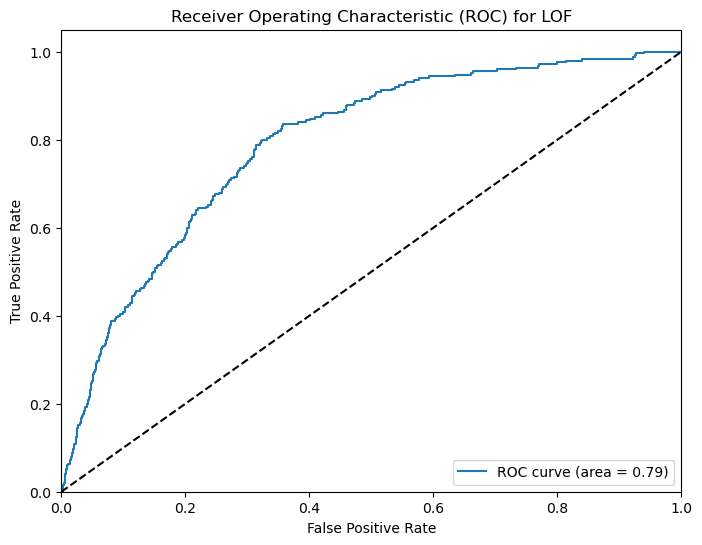

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(lof_fpr, lof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LOF')
plt.legend(loc="lower right")
plt.show()

In [51]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

0.8791208791208791


In [52]:
cblof_f1 = f1_score(y,cblof_pred)
print(f"F1: {cblof_f1:.2f}")

F1: 0.11


In [53]:
roc_auc = roc_auc_score(y, cblof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.62


In [54]:
cblof_fpr, cblof_tpr, _ = roc_curve(y, cblof_scores)

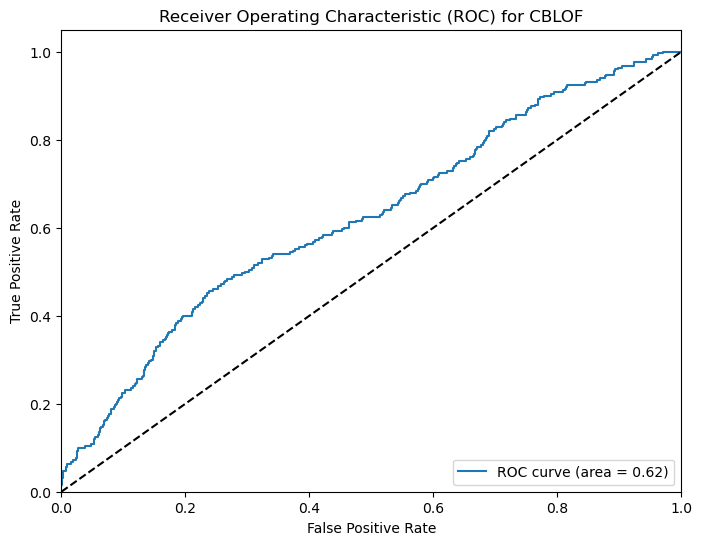

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(cblof_fpr, cblof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CBLOF')
plt.legend(loc="lower right")
plt.show()

In [56]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

0.8837478311162522


In [57]:
knn_f1 = f1_score(y,knn_pred)
print(f"F1: {knn_f1:.2f}")

F1: 0.15


In [58]:
roc_auc = roc_auc_score(y, knn_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.74


In [59]:
knn_fpr, knn_tpr, _ = roc_curve(y, knn_scores)


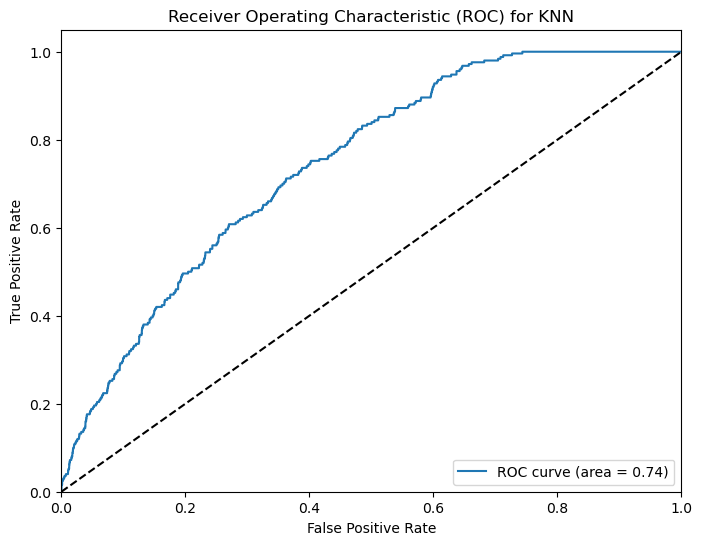

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc="lower right")
plt.show()

In [61]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

0.8880855986119144


In [62]:
cof_f1 = f1_score(y, cof_pred)
print(f"F1-score: {cof_f1:.2f}")

F1-score: 0.18


In [63]:
roc_auc = roc_auc_score(y, cof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.78


In [64]:
cof_fpr, cof_tpr, _ = roc_curve(y, cof_scores)


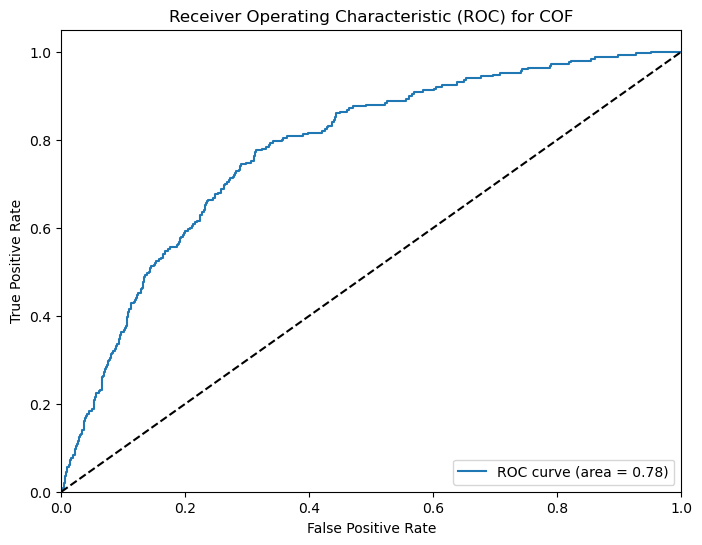

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(cof_fpr, cof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for COF')
plt.legend(loc="lower right")
plt.show()

Performance over multiple parameters

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score


c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

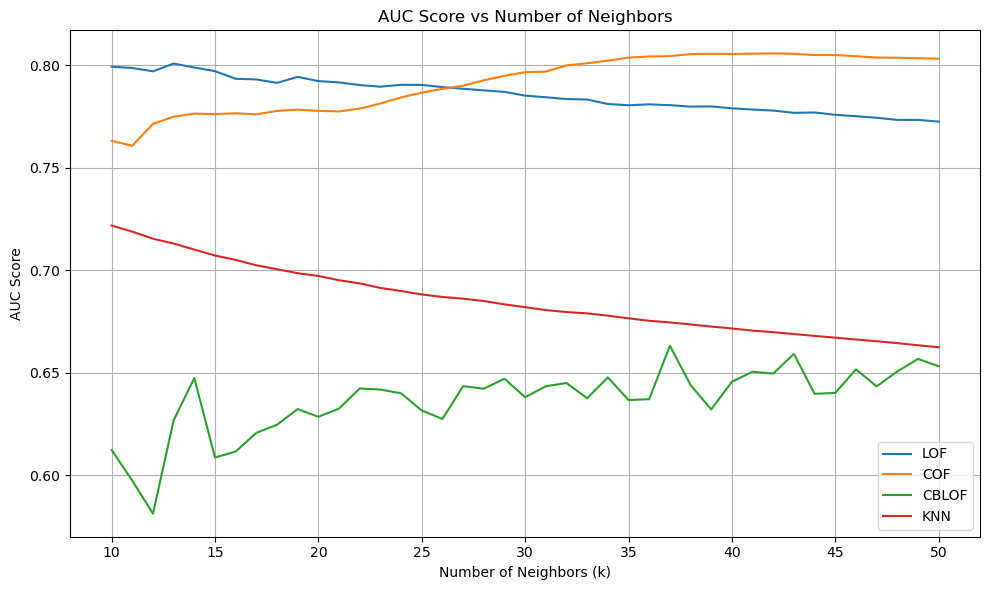

In [68]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []

precision_scores_lof = []
recall_scores_lof = []
f1_scores_lof = []

precision_scores_cblof = []
recall_scores_cblof = []
f1_scores_cblof = []

precision_scores_knn = []
recall_scores_knn = []
f1_scores_knn = []

precision_scores_cof = []
recall_scores_cof = []
f1_scores_cof = []

n_neighbors_list = list(range(10, 51))

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    y_pred_lof = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)
    auc_scores_lof.append(auc_lof)
    precision_lof = precision_score(y, y_pred_lof)
    recall_lof = recall_score(y, y_pred_lof)
    f1_lof = f1_score(y, y_pred_lof)
    precision_scores_lof.append(precision_lof)
    recall_scores_lof.append(recall_lof)
    f1_scores_lof.append(f1_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    y_pred_cof = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)
    auc_scores_cof.append(auc_cof)
    precision_cof = precision_score(y, y_pred_cof)
    recall_cof = recall_score(y, y_pred_cof)
    f1_cof = f1_score(y, y_pred_cof)
    precision_scores_cof.append(precision_cof)
    recall_scores_cof.append(recall_cof)
    f1_scores_cof.append(f1_cof)

    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    y_scores_cblof = cblof_model.decision_function(df)
    y_pred_cblof = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)
    auc_scores_cblof.append(auc_cblof)
    precision_cblof = precision_score(y, y_pred_cblof)
    recall_cblof = recall_score(y, y_pred_cblof)
    f1_cblof = f1_score(y, y_pred_cblof)
    precision_scores_cblof.append(precision_cblof)
    recall_scores_cblof.append(recall_cblof)
    f1_scores_cblof.append(f1_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    y_pred_knn = knn_model.labels_
    precision_knn = precision_score(y, y_pred_knn)
    recall_knn = recall_score(y, y_pred_knn)
    f1_knn = f1_score(y, y_pred_knn)
    precision_scores_knn.append(precision_knn)
    recall_scores_knn.append(recall_knn)
    f1_scores_knn.append(f1_knn)
    auc_knn = roc_auc_score(y, y_scores_knn)
    auc_scores_knn.append(auc_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_precision_lof = np.mean(precision_scores_lof)
mean_recall_lof = np.mean(recall_scores_lof)
mean_f1_lof = np.mean(f1_scores_lof)
mean_precision_cblof = np.mean(precision_scores_cblof)
mean_recall_cblof = np.mean(recall_scores_cblof)
mean_f1_cblof = np.mean(f1_scores_cblof)
mean_precision_knn = np.mean(precision_scores_knn)
mean_recall_knn = np.mean(recall_scores_knn)
mean_f1_knn = np.mean(f1_scores_knn)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

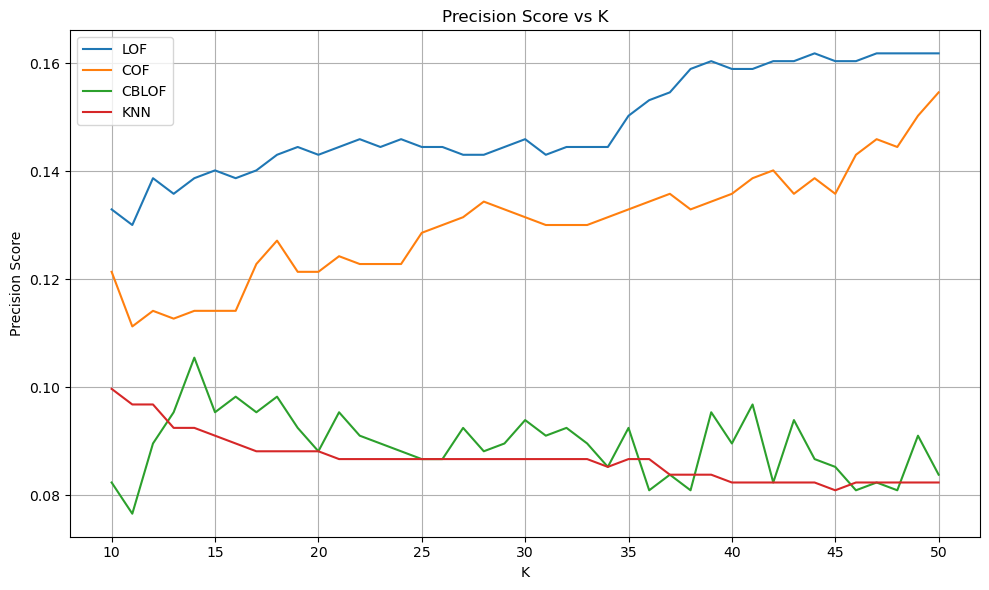

In [69]:
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, precision_scores_lof, label='LOF')

plt.plot(n_neighbors_list, precision_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, precision_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, precision_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('Precision Score')
plt.title('Precision Score vs K')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

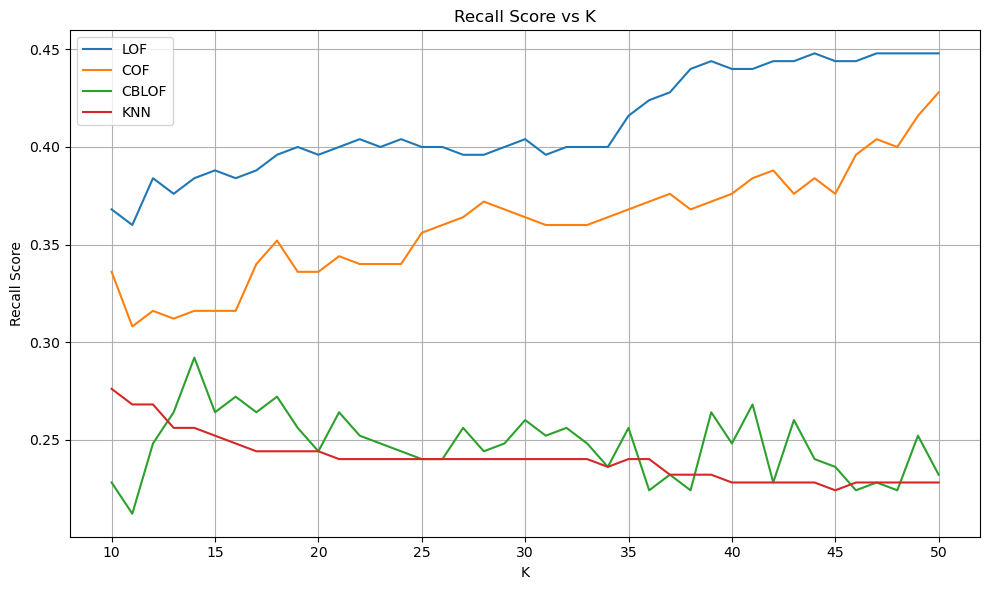

In [70]:
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, recall_scores_lof, label='LOF')

plt.plot(n_neighbors_list, recall_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, recall_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, recall_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('Recall Score')
plt.title('Recall Score vs K')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

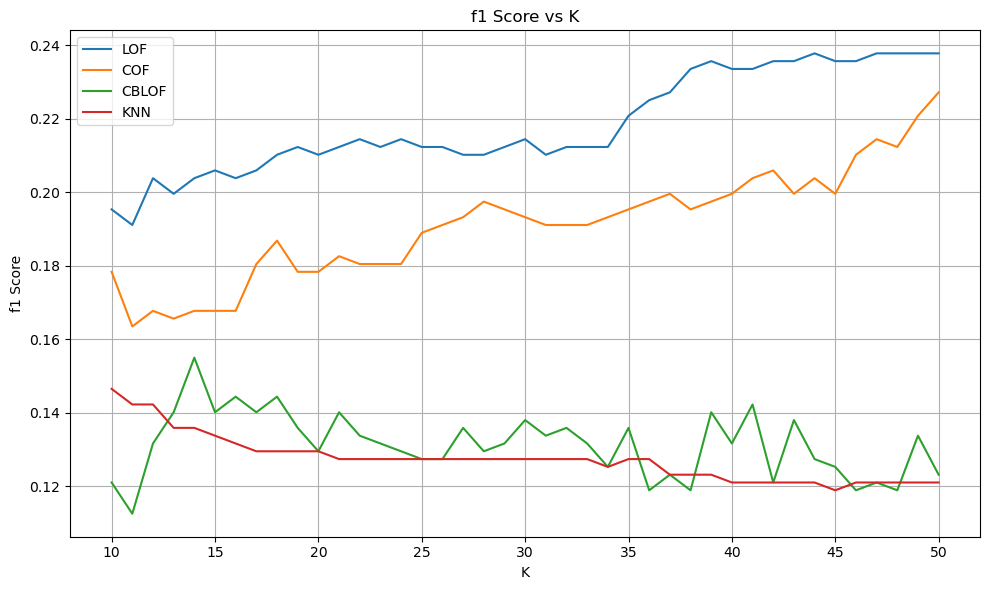

In [71]:
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, f1_scores_lof, label='LOF')

plt.plot(n_neighbors_list, f1_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, f1_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, f1_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('f1 Score')
plt.title('f1 Score vs K')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
print(f"Mean Precision for LOF: {mean_precision_lof:.4f}")
print(f"Mean Recall for LOF: {mean_recall_lof:.4f}")
print(f"Mean F1 Score for LOF: {mean_f1_lof:.4f}")

print(f"Mean Precision for CBLOF: {mean_precision_cblof:.4f}")
print(f"Mean Recall for CBLOF: {mean_recall_cblof:.4f}")
print(f"Mean F1 Score for CBLOF: {mean_f1_cblof:.4f}")

print(f"Mean Precision for KNN: {mean_precision_knn:.4f}")
print(f"Mean Recall for KNN: {mean_recall_knn:.4f}")
print(f"Mean F1 Score for KNN: {mean_f1_knn:.4f}")

Mean Precision for LOF: 0.1487
Mean Recall for LOF: 0.4115
Mean F1 Score for LOF: 0.2184
Mean Precision for CBLOF: 0.0894
Mean Recall for CBLOF: 0.2474
Mean F1 Score for CBLOF: 0.1313
Mean Precision for KNN: 0.0867
Mean Recall for KNN: 0.2399
Mean F1 Score for KNN: 0.1273


In [73]:
from emmv import emmv_scores

lof_emmv = emmv_scores(lof,df)
print('lof emmv',lof_emmv['em'])
cblof_emmv = emmv_scores(cblof,df)
print('cblof emmv',cblof_emmv['em'])
knn_emmv = emmv_scores(knn,df)
print('knn emmv',knn_emmv['em'])
cof_emmv = emmv_scores(cof,df)
print('cof emmv',cof_emmv['em'])

lof emmv 0.00504856853672643
cblof emmv 0.00504856853672643
knn emmv 0.005034253903990745
cof emmv 0.29923407207513014


In [74]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)


KNN auc 0.6853020789883867
LOF auc 0.7856019992243126
CBLOF auc 0.6367061974490131
COF auc 0.791470805617147
